In [10]:
import pandas as pd

# Load data
df = pd.read_csv("S:/Course work/3rd year/Artificial Intelligence & Machine Learning/Workshop7/adult_T7.csv")


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
df = df.dropna()  # Drop missing values if any
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target
X = df.drop('income', axis=1)
y = df['income']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluation
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.4f}")


Random Forest Accuracy: 0.8492
Logistic Regression Accuracy: 0.8217
Support Vector Machine Accuracy: 0.8398
K-Nearest Neighbors Accuracy: 0.8143


<Axes: title={'center': 'Random Forest Feature Importances'}>

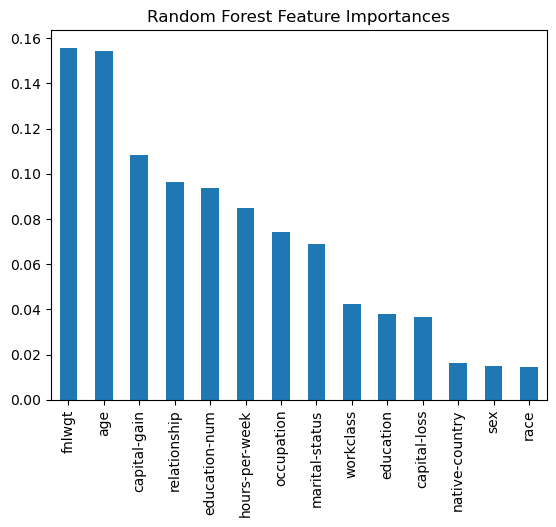

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Random Forest Feature Importances')


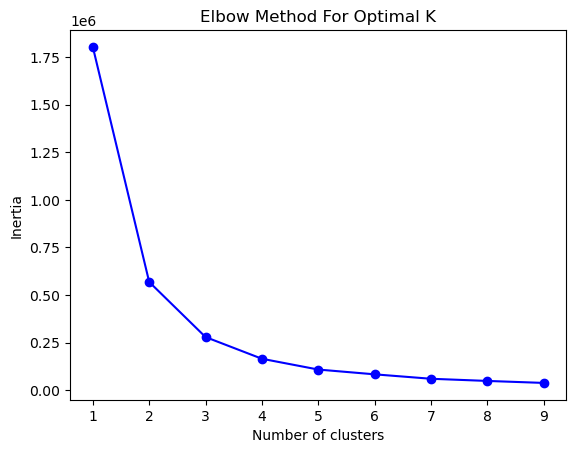

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Select numerical column
X_cluster = df[['age']]

# Reshape the series properly
X_values = X_cluster["age"].values.reshape(-1, 1)

# Elbow method for optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_values)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.show()


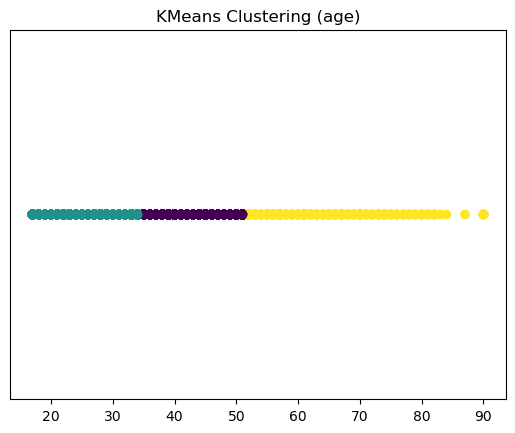

In [15]:
# Apply clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_values)

gmm = GaussianMixture(n_components=3, random_state=42)
df['gmm_cluster'] = gmm.fit_predict(X_values)

# Plot the KMeans clustering
plt.scatter(df['age'], [0]*len(df), c=df['kmeans_cluster'], cmap='viridis')
plt.title('KMeans Clustering (age)')
plt.yticks([])
plt.show()
